## Importações dos pacotes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from funcoes import plota_grafico, thousand_formatter, million_formatter

In [2]:
casos = pd.read_csv('../dados_limpos/casos_obitos_hep')
vacinas = pd.read_csv('../dados_limpos/vacinas_hep')
dados_reg = pd.read_csv('../dados_limpos/casos_obitos_por_regiao')

In [3]:
dados_reg

,Ano,Classe_viral,Regiao,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,Norte,2868,NaN,13245084.0,21.653317,NaN
1,2001,B,Norte,820,NaN,13245084.0,6.190976,NaN
2,2001,C,Norte,287,NaN,13245084.0,2.166842,NaN
3,2002,A,Norte,2755,NaN,13504599.0,20.400458,NaN
4,2002,B,Norte,1032,NaN,13504599.0,7.641841,NaN
...,...,...,...,...,...,...,...,...
280,2018,B,Centro-Oeste,1108,32.0,16085885.0,6.888026,0.198932
281,2018,C,Centro-Oeste,959,97.0,16085885.0,5.961748,0.603013
282,2019,A,Centro-Oeste,54,NaN,16297074.0,0.331348,NaN
283,2019,B,Centro-Oeste,1081,NaN,16297074.0,6.633093,NaN


In [4]:
casos.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,21011,NaN,172385826.0,12.188357,NaN
1,2001,B,8344,NaN,172385826.0,4.840305,NaN
2,2001,C,6713,NaN,172385826.0,3.894172,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN
4,2002,B,8841,NaN,174632960.0,5.062618,NaN


In [5]:
vacinas.head()

,Ano,Classe_viral,Vacinas
0,2001,A,41062
1,2002,A,58788
2,2003,A,68883
3,2004,A,85271
4,2005,A,100081


In [6]:
dados = pd.merge(casos, vacinas, on=['Ano', 'Classe_viral'], how='left')
dados.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Vacinas
0,2001,A,21011,NaN,172385826.0,12.188357,NaN,41062.0
1,2001,B,8344,NaN,172385826.0,4.840305,NaN,35206019.0
2,2001,C,6713,NaN,172385826.0,3.894172,NaN,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN,58788.0
4,2002,B,8841,NaN,174632960.0,5.062618,NaN,30906741.0


In [7]:
dados.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Vacinas
0,2001,A,21011,NaN,172385826.0,12.188357,NaN,41062.0
1,2001,B,8344,NaN,172385826.0,4.840305,NaN,35206019.0
2,2001,C,6713,NaN,172385826.0,3.894172,NaN,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN,58788.0
4,2002,B,8841,NaN,174632960.0,5.062618,NaN,30906741.0


In [8]:
help(plota_grafico)

Help on function plota_grafico in module funcoes:

plota_grafico(dados: pandas.core.frame.DataFrame, x: str, y: str, hue=None, title='', subtitle=None, xlabel=None, ylabel=None, dict_hue_palette=None, palette_sns=None, formatter_x=None, formatter_y=None, file_name=None, xlim=None, ylim=None, hue_legend=None, style='darkgrid', show=True, ax=None, color_xlabel='dimgray', color_ylabel='dimgray', color_title='black', color_sub='dimgray', color_xticks='dimgray', color_yticks='dimgray', legend=False, legend_title='', title_loc='left', kind='line', por_ano=False, **kwargs)
    Função que plota um gráfico entre duas variáveis, podendo ser um 'lineplot' do seaborn, 'scatterplot' ou um 'barplot' do seaborn
    
    Parâmentros:
    
            dados : DataFrame do pandas onde estão os dados, tipo=pd.DataFrame 
            x : coluna associada ao eixo x, tipo : str
            y : coluna associada ao eixo y, tipo : str
            hue : variável associada à tonalidade, tipo : str, padrão : None


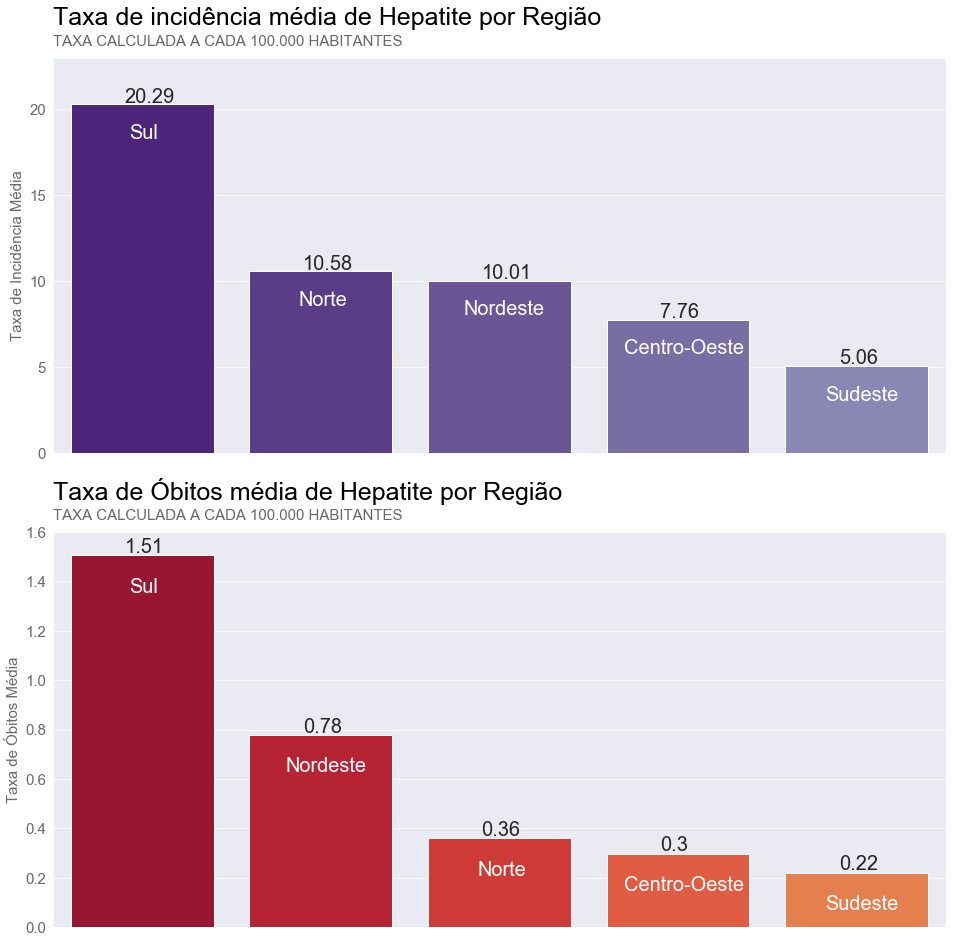

In [9]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg = dados_reg.groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_taxa_ind_reg, 'Regiao', 'taxa_incid_por100k', kind='bar', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Incidência Média', ylim=[0,23])
ax[0].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_ind_reg['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']+0.1, str(round(dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']-2, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg = dados_reg.groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
plota_grafico(dados_taxa_obitos_reg, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Óbitos Média', ylim=[0,1.6])
ax[1].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_obitos_reg['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']+0.01, str(round(dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']-0.15, reg, fontsize=20, color='white')
    
plt.savefig('../images/taxa_incid_reg')

plt.show()

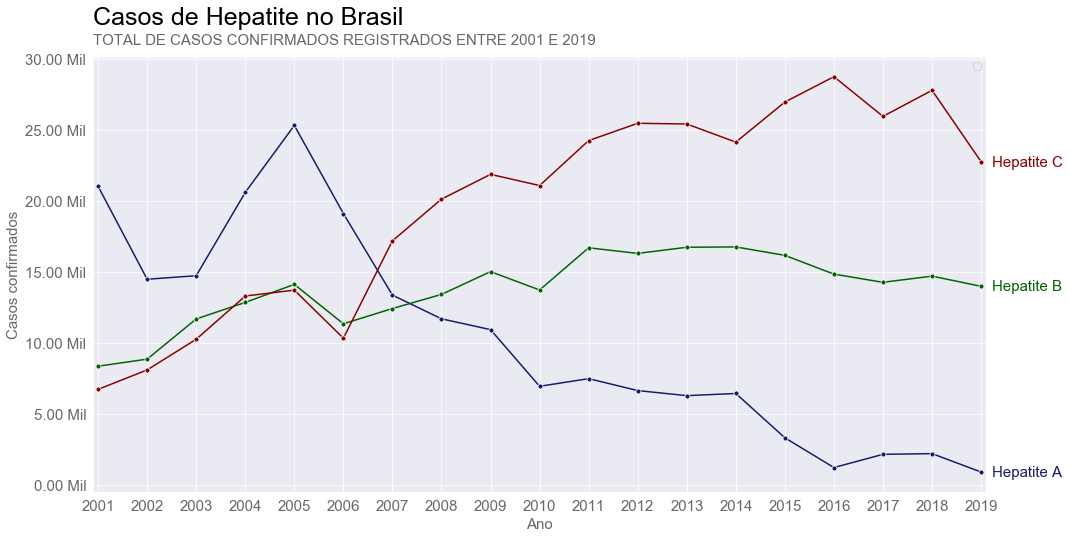

In [10]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_grafico(dados, 'Ano', 'Casos', hue='Classe_viral', title='Casos de Hepatite no Brasil',
          subtitle='TOTAL DE CASOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], formatter_y=thousand_formatter, file_name='casos_hep', xlim=[2000.9, 2019.1],
          xlabel='Ano', ylabel='Casos confirmados', marker='.', markersize=10,por_ano=True)

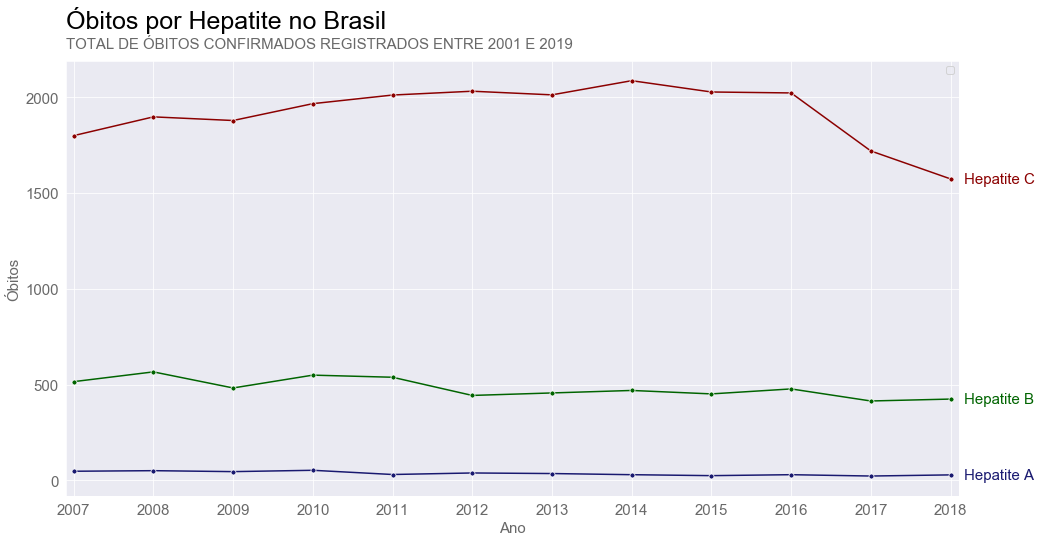

In [11]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_grafico(dados.dropna(subset=['Obitos']), 'Ano', 'Obitos', hue='Classe_viral', title='Óbitos por Hepatite no Brasil',
             subtitle='TOTAL DE ÓBITOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Óbitos',
             hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='obitos_hep', xlim=[2006.9, 2018.1], marker='.', markersize=10,por_ano=True)

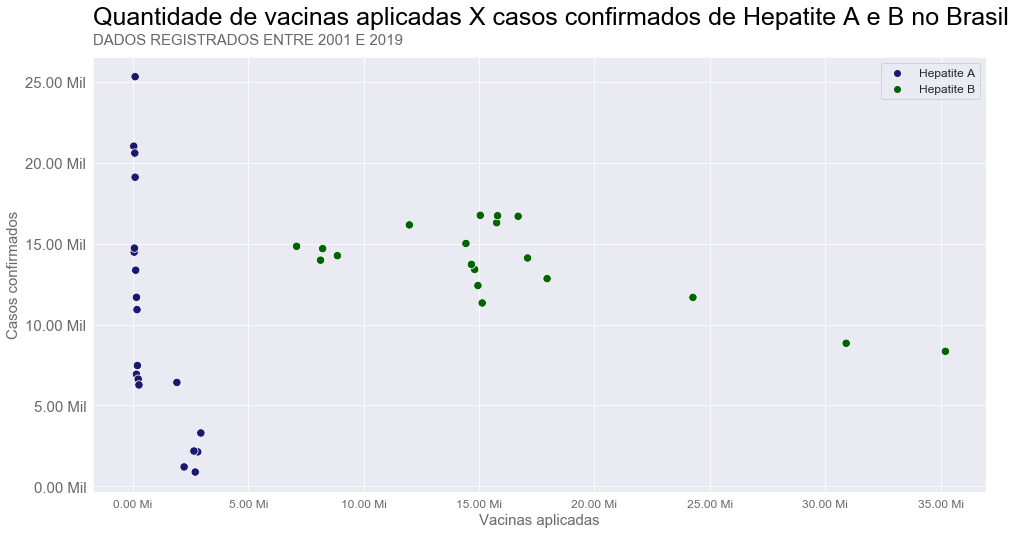

In [12]:
plota_grafico(dados.query('Classe_viral == "A" or Classe_viral == "B"'), 'Vacinas', 'Casos',
          hue='Classe_viral',formatter_x=million_formatter, formatter_y=thousand_formatter,kind='scatter',
          title='Quantidade de vacinas aplicadas X casos confirmados de Hepatite A e B no Brasil',
          subtitle='DADOS REGISTRADOS ENTRE 2001 E 2019', color='#191970',
          dict_hue_palette=dict_palette, xlabel='Vacinas aplicadas', ylabel='Casos confirmados',
          hue_legend=['Hepatite A', 'Hepatite B'], legend=True, file_name='vacinaXcasos', s=70)

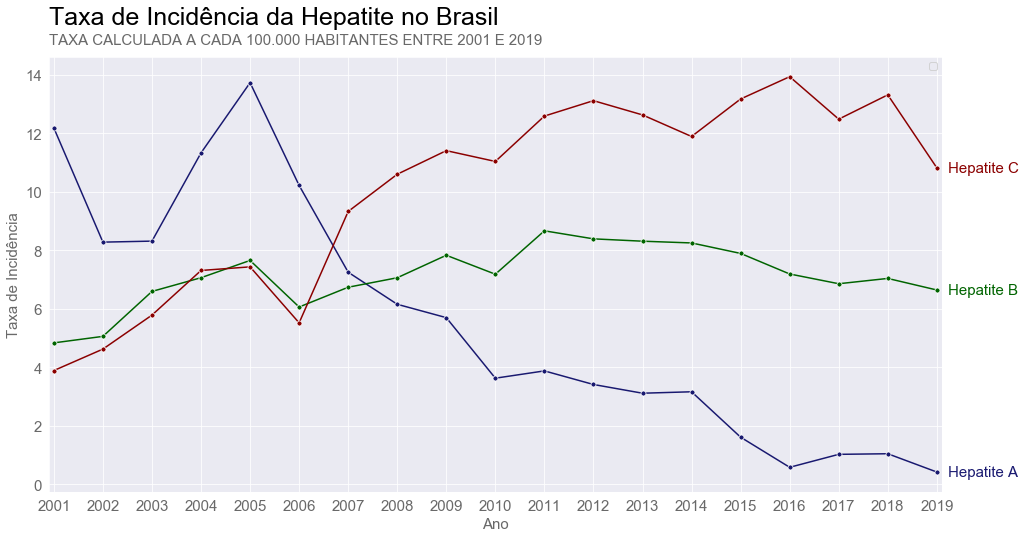

In [13]:
plota_grafico(dados, 'Ano', 'taxa_incid_por100k', hue='Classe_viral', title='Taxa de Incidência da Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          xlabel='Ano', ylabel='Taxa de Incidência',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_indic', xlim=[2000.9, 2019.1], marker='.', markersize=10,por_ano=True)

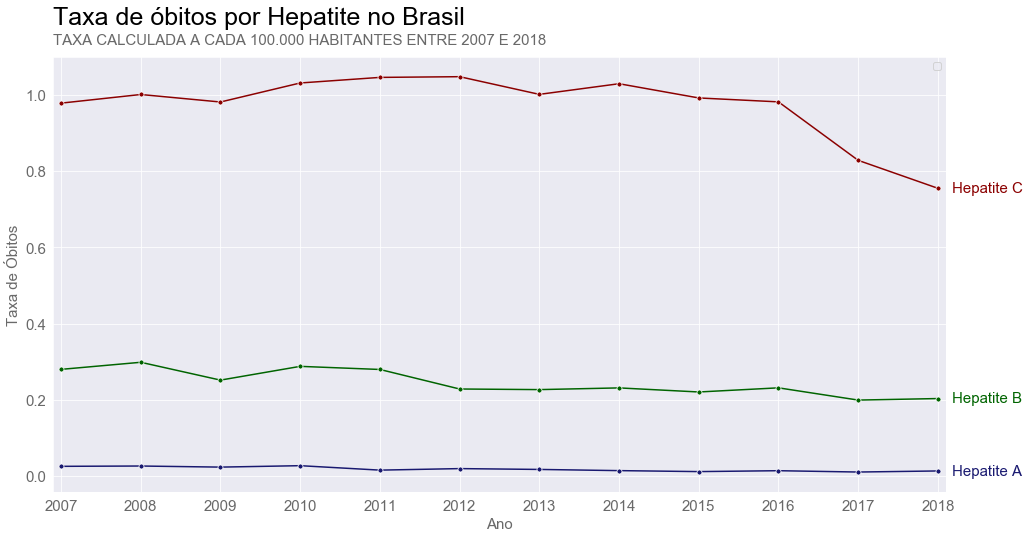

In [14]:
plota_grafico(dados.dropna(subset=['taxa_obitos_por100k']), 'Ano', 'taxa_obitos_por100k', hue='Classe_viral', title='Taxa de óbitos por Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2007 E 2018',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Taxa de Óbitos',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos', xlim=[2006.9, 2018.1], marker='.', markersize=10,por_ano=True)

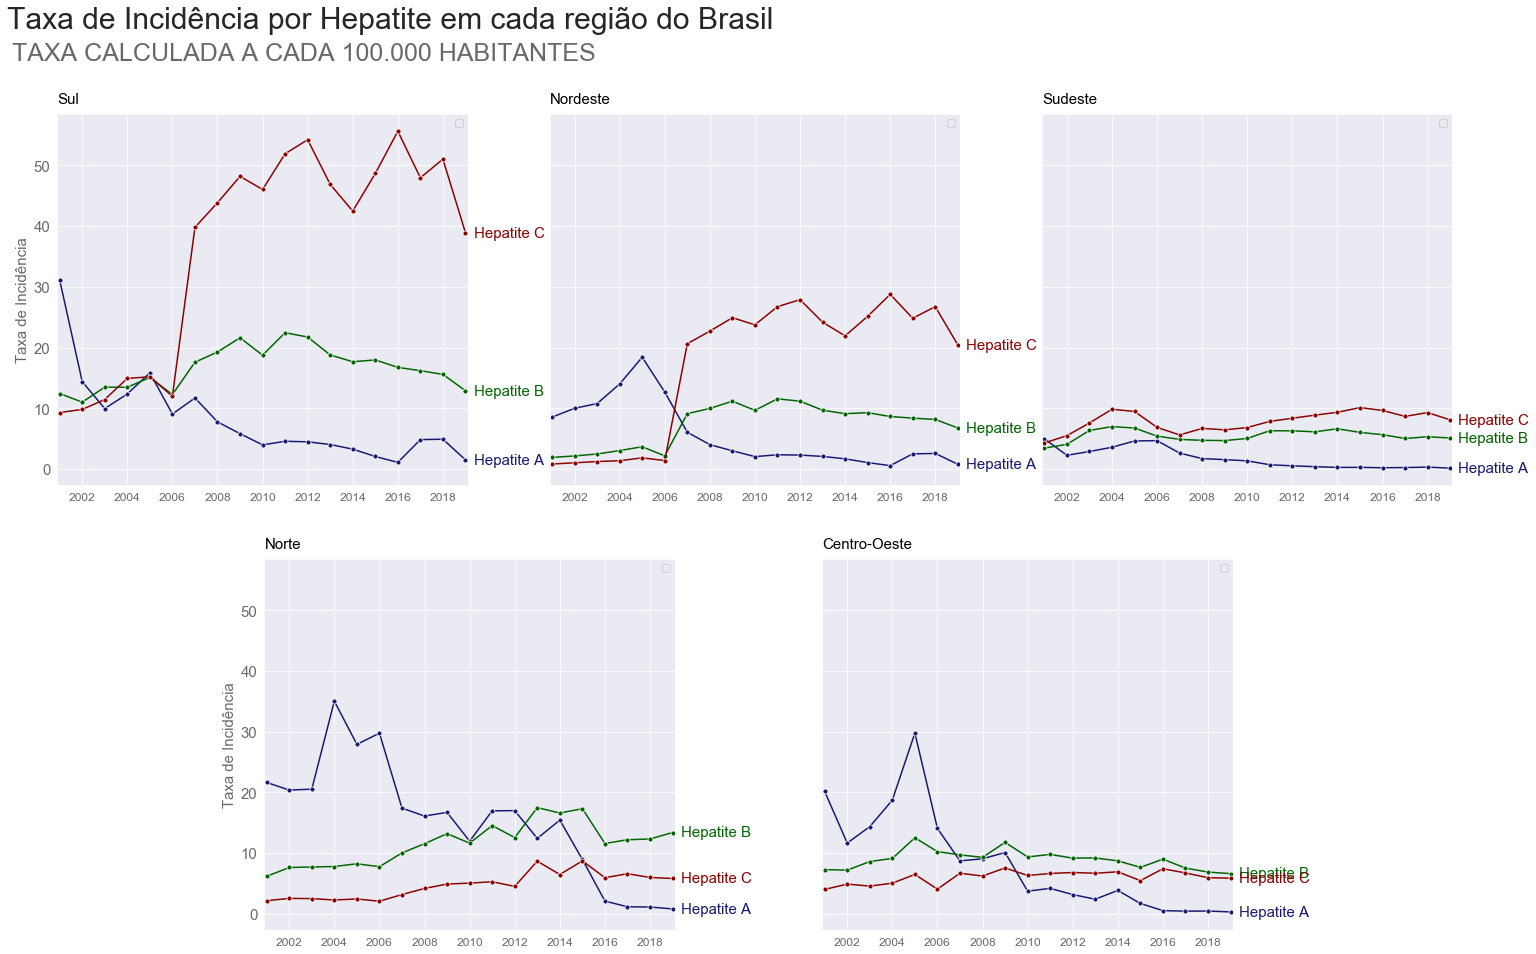

In [15]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Incidência por Hepatite em cada região do Brasil', fontsize=30, x=0.31)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_incid_por100k', hue='Classe_viral', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], xlim=[2000.9, 2019.1],
          ylabel='Taxa de Incidência', marker='.', markersize=10, ax=ax, show=False)
    plt.sca(ax)
    plt.xticks(range(2002,2020,2), range(2002, 2020,2))

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_incid_por_reg')

plt.show()

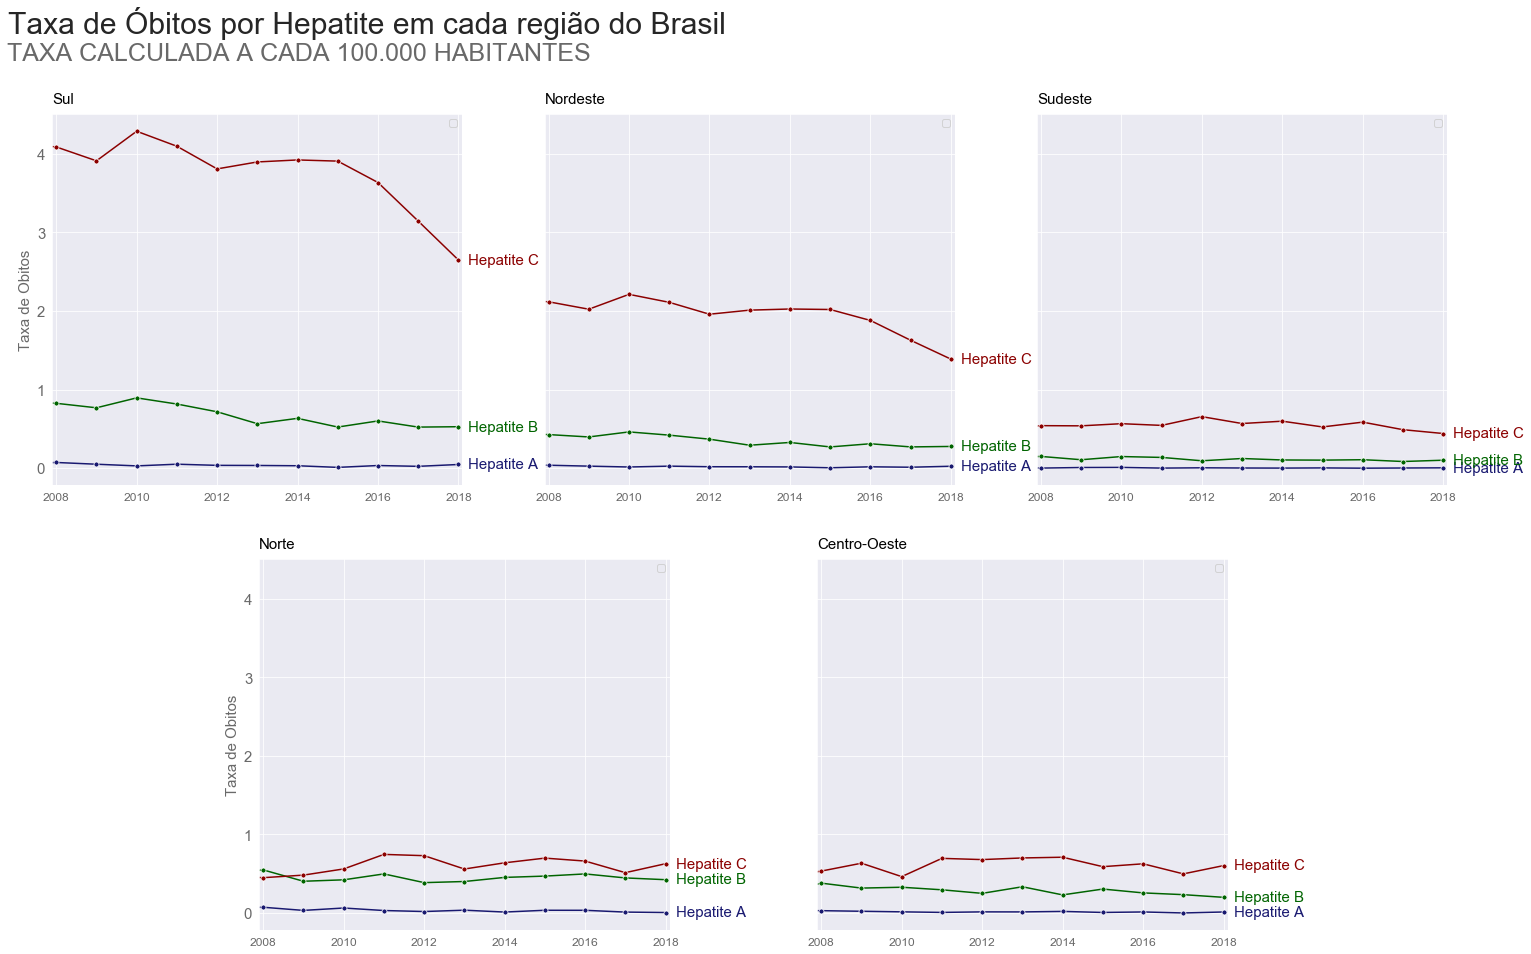

In [16]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Óbitos por Hepatite em cada região do Brasil', fontsize=30, x=0.30)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_obitos_por100k', hue='Classe_viral', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos_por_reg', xlim=[2007.9, 2018.1],
          ylabel='Taxa de Obitos', marker='.', markersize=10, ax=ax, show=False)
    plt.sca(ax)
    plt.xticks(range(2008,2019,2), range(2008, 2019,2))

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_obitos_por_reg')

plt.show()

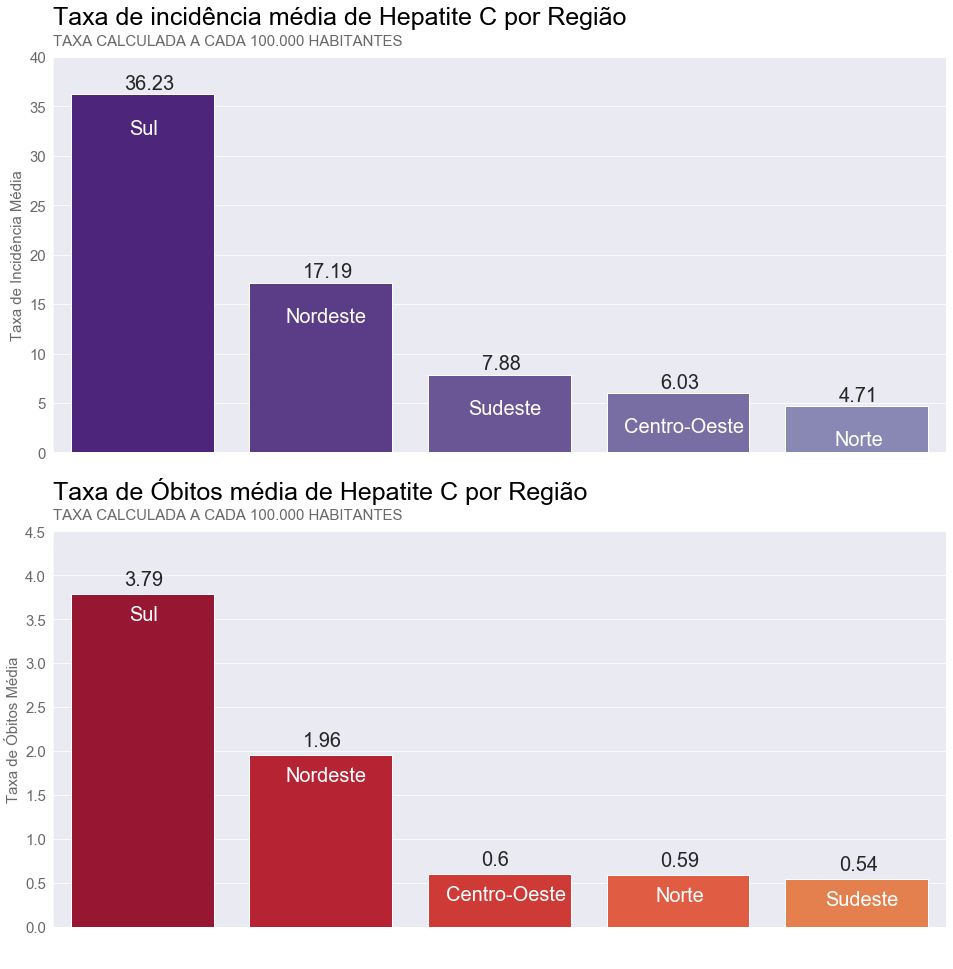

In [17]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg_c = dados_reg[dados_reg['Classe_viral'] == 'C'].groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

fig, ax = plt.subplots(2,1,figsize=(16,16))
ax[0] = plota_grafico(dados_taxa_ind_reg_c, 'Regiao', 'taxa_incid_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Incidência Média', ylim=[0,40])

for i,reg in zip(range(0,5),dados_taxa_ind_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']+0.5, str(round(dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']-4, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg_c = dados_reg[dados_reg['Classe_viral'] == 'C'].groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
ax[1] = plota_grafico(dados_taxa_obitos_reg_c, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Óbitos Média', ylim=[0,4.5])

for i,reg in zip(range(0,5),dados_taxa_obitos_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']+0.1, str(round(dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']-0.3, reg, fontsize=20, color='white')

plt.savefig('../images/taxa_incid_hepC_reg')

plt.show()